In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/EPL 19-20 outfield_colR.csv')
pd.set_option('display.max_columns', None)

In [3]:
# Filter for Midfielders
mask = (df.position == 'Midfielder')
df = df.loc[mask]

In [4]:
columns = df.columns

In [5]:
[col for col in columns]

['player_id',
 'position',
 'player',
 'age',
 'team_id',
 'team',
 'foot',
 'mins_played',
 'nineties',
 'total_scoring_att',
 'ontarget_scoring_att',
 'blocked_scoring_att',
 'goals',
 'own_goals',
 'post_scoring_att',
 'total_pass',
 'accurate_pass',
 'total_cross',
 'accurate_cross',
 'total_fwd_zone_pass',
 'accurate_fwd_zone_pass',
 'total_through_ball',
 'accurate_through_ball',
 'goal_assist',
 'ontarget_att_assist',
 'total_att_assist',
 'total_tackle',
 'won_tackle',
 'won_corners',
 'lost_corners',
 'total_offside',
 'fouls',
 'hand_ball',
 'dangerous_play',
 'was_fouled',
 'total_contest',
 'won_contest',
 'interception',
 'total_clearance',
 'effective_clearance',
 'total_long_balls',
 'accurate_long_balls',
 'passes_right',
 'passes_left',
 'att_bx_centre',
 'att_bx_right',
 'att_bx_left',
 'att_obx_centre',
 'att_obx_right',
 'att_obx_left',
 'att_lg_centre',
 'att_lg_right',
 'att_lg_left',
 'att_bxd_right',
 'att_bxd_left',
 'att_obxd_right',
 'att_obxd_left',
 'att_sv

In [6]:
skill_cols = [
 'total_scoring_att',
 'ontarget_scoring_att',
 'blocked_scoring_att',
 'goals',
 'own_goals',
 'post_scoring_att',
 'total_pass',
 'accurate_pass',
 'total_cross',
 'accurate_cross',
 'total_fwd_zone_pass',
 'accurate_fwd_zone_pass',
 'total_through_ball',
 'accurate_through_ball',
 'goal_assist',
 'ontarget_att_assist',
 'total_att_assist',
 'total_tackle',
 'won_tackle',
 'won_corners',
 'lost_corners',
 'total_offside',
 'fouls',
 'hand_ball',
 'dangerous_play',
 'was_fouled',
 'total_contest',
 'won_contest',
 'interception',
 'total_clearance',
 'effective_clearance',
 'total_long_balls',
 'accurate_long_balls',
 'passes_right',
 'passes_left',
 'att_bx_centre',
 'att_bx_right',
 'att_bx_left',
 'att_obx_centre',
 'att_obx_right',
 'att_obx_left',
 'att_lg_centre',
 'att_lg_right',
 'att_lg_left',
 'att_bxd_right',
 'att_bxd_left',
 'att_obxd_right',
 'att_obxd_left',
 'att_sv_high_centre',
 'att_sv_high_right',
 'att_sv_high_left',
 'att_sv_low_centre',
 'att_sv_low_right',
 'att_sv_low_left',
 'att_goal_high_centre',
 'att_goal_high_right',
 'att_goal_high_left',
 'att_goal_low_centre',
 'att_goal_low_left',
 'att_goal_low_right',
 'att_post_high',
 'att_post_left',
 'att_post_right',
 'att_miss_high_right',
 'att_miss_high_left',
 'att_miss_high',
 'att_miss_right',
 'att_miss_left',
 'att_cmiss_high_right',
 'att_cmiss_high_left',
 'att_cmiss_high',
 'att_cmiss_right',
 'att_cmiss_left',
 'att_rf_goal',
 'att_lf_goal',
 'att_hd_goal',
 'att_rf_miss',
 'att_lf_miss',
 'att_hd_miss',
 'att_rf_target',
 'att_lf_target',
 'att_hd_target',
 'att_rf_post',
 'att_lf_post',
 'att_hd_post',
 'att_fastbreak',
 'att_rf_total',
 'att_lf_total',
 'att_hd_total',
 'yellow_card',
 'red_card',
 'penalty_conceded',
 'goals_conceded',
 'clean_sheet',
 'att_ibox_goal',
 'att_ibox_target',
 'att_ibox_miss',
 'att_ibox_post',
 'att_ibox_blocked',
 'att_obox_goal',
 'att_obox_target',
 'att_obox_miss',
 'att_obox_post',
 'att_obox_blocked',
 'offtarget_att_assist',
 'total_back_zone_pass',
 'accurate_back_zone_pass',
 'last_man_contest',
 'last_man_tackle',
 'outfielder_block',
 'total_sub_on',
 'total_sub_off',
 'total_cross_nocorner',
 'accurate_cross_nocorner',
 'total_corners_intobox',
 'accurate_corners_intobox',
 'clearance_off_line',
 'goals_conceded_ibox',
 'goals_conceded_obox',
 'attempts_conceded_ibox',
 'attempts_conceded_obox',
 'six_yard_block',
 'head_pass',
 'challenge_lost',
 'aerial_won',
 'aerial_lost',
 'pen_goals_conceded',
 'duel_won',
 'duel_lost',
 'head_clearance',
 'effective_head_clearance',
 'crosses_18yard',
 'crosses_18yardplus',
 'interceptions_in_box',
 'long_pass_own_to_opp',
 'long_pass_own_to_opp_success',
 'ball_recovery',
 'offside_provoked',
 'error_lead_to_shot',
 'error_lead_to_goal',
 'turnover',
 'dispossessed',
 'shot_off_target',
 'touches',
 'final_third_entries',
 'total_launches',
 'accurate_launches',
 'total_layoffs',
 'accurate_layoffs',
 'goal_assist_intentional',
 'penalty_won',
 'total_chipped_pass',
 'accurate_chipped_pass',
 'total_flick_on',
 'accurate_flick_on',
 'shield_ball_oop',
 'foul_throw_in',
 'blocked_cross',
 'effective_blocked_cross',
 'total_pull_back',
 'accurate_pull_back',
 'goal_assist_openplay',
 'att_assist_openplay',
 'overrun',
 'interception_won',
 'big_chance_created',
 'big_chance_missed',
 'big_chance_scored',
 'unsuccessful_touch',
 'fwd_pass',
 'backward_pass',
 'leftside_pass',
 'rightside_pass',
 'total_final_third_passes',
 'successful_final_third_passes',
 'second_goal_assist',
 'hit_woodwork',
 'goal_fastbreak',
 'shot_fastbreak',
 'poss_won_def_3rd',
 'poss_won_mid_3rd',
 'poss_won_att_3rd',
 'poss_lost_all',
 'poss_lost_ctrl',
 'pen_area_entries',
 'total_fastbreak',
 'att_one_on_one',
 'fouled_final_third',
 'goals_openplay',
 'att_openplay',
 'assist_pass_lost',
 'assist_blocked_shot',
 'assist_attempt_saved',
 'assist_post',
 'assist_free_kick_won',
 'assist_handball_won',
 'assist_own_goal',
 'assist_penalty_won',
 'open_play_pass',
 'successful_open_play_pass',
 'attempted_tackle_foul',
 'put_through',
 'successful_put_through',
 'blocked_pass',
 'touches_in_opp_box',
 'attempts_ibox',
 'attempts_obox',
 'expected_goals_nonpenalty',
 'expected_goals_openplay',
 'expected_goals_hd',
 'expected_goals_lf',
 'expected_goals_rf',
 'expected_goals_conceded',
 'expected_goals_nonpenalty_conceded',
 'expected_goalsontarget',
 'expected_goalsontarget_nonpenalty',
 'expected_goalsontarget_nonpenalty_conceded',
 'expected_assists',
 'expected_assists_openplay']

In [7]:
dfskills = df[skill_cols]

In [8]:
dfskills

,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,interception,total_clearance,effective_clearance,total_long_balls,accurate_long_balls,passes_right,passes_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_fastbreak,att_rf_total,att_lf_total,att_hd_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,head_pass,challenge_lost,aerial_won,aerial_lost,pen_goals_conceded,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,total_pull_back,accurate_pull_back,goal_assist_openplay,att_assist_openplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,second_goal_assist,hit_woodwork,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,total_fastbreak,att_one_on_one,fouled_final_third,goals_openplay,att_openplay,assist_pass_lost,assist_blocked_shot,assist_attempt_saved,assist_post,assist_free_kick_won,assist_handball_won,assist_own_goal,assist_penalty_won,open_play_pass,successful_open_play_pass,attempted_tackle_foul,put_through,successful_put_through,blocked_pass,touches_in_opp_box,attempts_ibox,attempts_obox,expected_goals_nonpenalty,expected_goals_openplay,expected_goals_hd,expected_goals_lf,expected_goals_rf,expected_goals_conceded,expected_goals_nonpenalty_conceded,expected_goalsontarget,expected_goalsontarget_nonpenalty,expected_goalsontarget_nonpenalty_conceded,expected_assists,expected_assists_openplay
3,1.614535,0.745170,0.413983,0.124195,0.0,0.000000,26.536339,20.699172,3.643054,0.538178,24.052438,16.559338,0.165593,0.082797,0.248390,0.620975,1.034959,0.869365,0.413983,1.200552,0.082797,0.082797,0.413983,0.000000,0.0,2.069917,2.525299,1.076357,0.248390,0.165593,0.165593,1.159154,0.496780,7.700092,5.257590,0.413983,0.165593,0.331187,0.579577,0.000000,0.00

In [9]:
len(dfskills.columns)

219

In [10]:
# import pandas_profiling

In [11]:
from sklearn.decomposition import PCA
pca = PCA().fit(dfskills)

In [12]:
dfskills.dropna(inplace=True)

/Users/ollinj01/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
# import plotly_express as px
# import plotly.graph_objs as go
# import chart_studio.plotly as py
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)

In [14]:
# corr = dfskills.corr()
# trace = go.Heatmap(z=corr,x=corr.index,y=corr.columns)
# data = [trace]
# layout = dict(title="Correlation Plot of Player Skills")
# fig = dict(data=data, layout=layout)
# # iplot(fig)

In [15]:
from sklearn.decomposition import PCA
pca = PCA().fit(dfskills)

In [16]:
# pcaratio = pca.explained_variance_ratio_
# trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
# data = [trace]
# layout = dict(title="Player Skills Dataset - PCA Explained Variance || 89% achieved at 5 components")
# fig = dict(data=data, layout=layout)
# iplot(fig)

In [17]:
pca = PCA(n_components=2)
skillsPCA = pca.fit_transform(dfskills)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [19]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

In [20]:
from sklearn.manifold import TSNE
X = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']

In [21]:
pca2 = PCA(n_components=2)
skillsPCA2 = pca2.fit_transform(dfskills)
dfskillsPCA2 = pd.DataFrame(skillsPCA2)
dfskillsPCA2['cluster'] = skillsPCA_labels
dfskillsPCA2.columns = ['x1','x2','cluster']

In [22]:
# fig, ax = plt.subplots(1, 2, figsize=(12,6))
# sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
# ax[0].set_title('Visualized on TSNE 2D')
# sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
# ax[1].set_title('Visualized on PCA 2D')
# fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
# display(fig)

In [23]:
kmeans = KMeans(n_clusters=4)
clustering_ori = kmeans.fit_predict(dfskills)

In [24]:
dftsne2D = dftsne
dftsne2D['cluster'] = clustering_ori

In [25]:
X = dfskills
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsneFull = pd.DataFrame(Xtsne)

In [26]:
dftsneFull['cluster'] = clustering_ori
dftsneFull.columns = ['x1','x2','cluster']

In [27]:
# fig, ax = plt.subplots(1, 2, figsize=(12,6))
# sns.scatterplot(data=dftsne2D,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
# ax[0].set_title('Visualized on TSNE 5D>2D')
# sns.scatterplot(data=dftsneFull,x='x1',y='x2',hue='cluster',legend="full",alpha=0.7,ax=ax[1])
# ax[1].set_title('Visualized on TSNE 34D>2D')
# fig.suptitle('Comparing clustering result when visualized using TSNE 5D>2D vs. TSNE 34D>2D')
# display(fig)

In [28]:
dfskills['cluster'] = clustering_ori

/Users/ollinj01/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
# Some functions to plot just the variables that has significant deviation from global mean
def outside_limit(df, label_col, label, sensitivity):
    feature_list = dfskills.columns[:-1]
    
    plot_list = []
    mean_overall_list = []
    mean_cluster_list = []

    for i,varname in enumerate(feature_list):
        # get overall mean for a variable, set lower and upper limit
        mean_overall = df[varname].mean()
        lower_limit = mean_overall - (mean_overall*sensitivity)
        upper_limit = mean_overall + (mean_overall*sensitivity)
        
        # get cluster mean for a variable
        cluster_filter = df[label_col]==label
        pd_cluster = df[cluster_filter]
        mean_cluster = pd_cluster[varname].mean()
        
        # create filter to display graph with 0.5 deviation from the mean
        if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
            plot_list.append(varname)
            try:
                mean_overall_std = mean_overall/mean_overall
            except ZeroDivisionError:
                mean_overall_std  = np.nan
            try:
                mean_cluster_std = mean_cluster/mean_overall
            except ZeroDivisionError:
                mean_cluster_std = np.nan
                
            mean_overall_list.append(mean_overall_std)
            mean_cluster_list.append(mean_cluster_std)
    
    mean_df = pd.DataFrame({'feature_list':plot_list,
                            'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
    mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)

    return mean_df

def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
    
    mean_df = outside_limit(df, label_col, label, sensitivity)
    mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)
    
    if len(mean_df.index) != 0:
        sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                    alpha=0.75, dodge=True, ax=ax)
        
        for i,p in enumerate(ax.patches):
            ax.annotate("{:.02f}".format((p.get_width())), 
            (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')
            
    ax.set_title('Unique Characteristics of Cluster ' + str(label))
    ax.set_xlabel('Standardized Mean')
    ax.axvline(x=1, color='k')

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
    n_plot = n_clusters
    fig, ax = plt.subplots(n_plot, 1, figsize=(12, n_plot*6), sharex='col')
    ax= ax.ravel()
    
    label = np.arange(n_clusters)
    for i in label:
        plot_barchart_all_unique_features(df, label_col, label=i, ax=ax[i], sensitivity=sensitivity)
        ax[i].xaxis.set_tick_params(labelbottom=True)
    
    plt.tight_layout()
    display(fig)

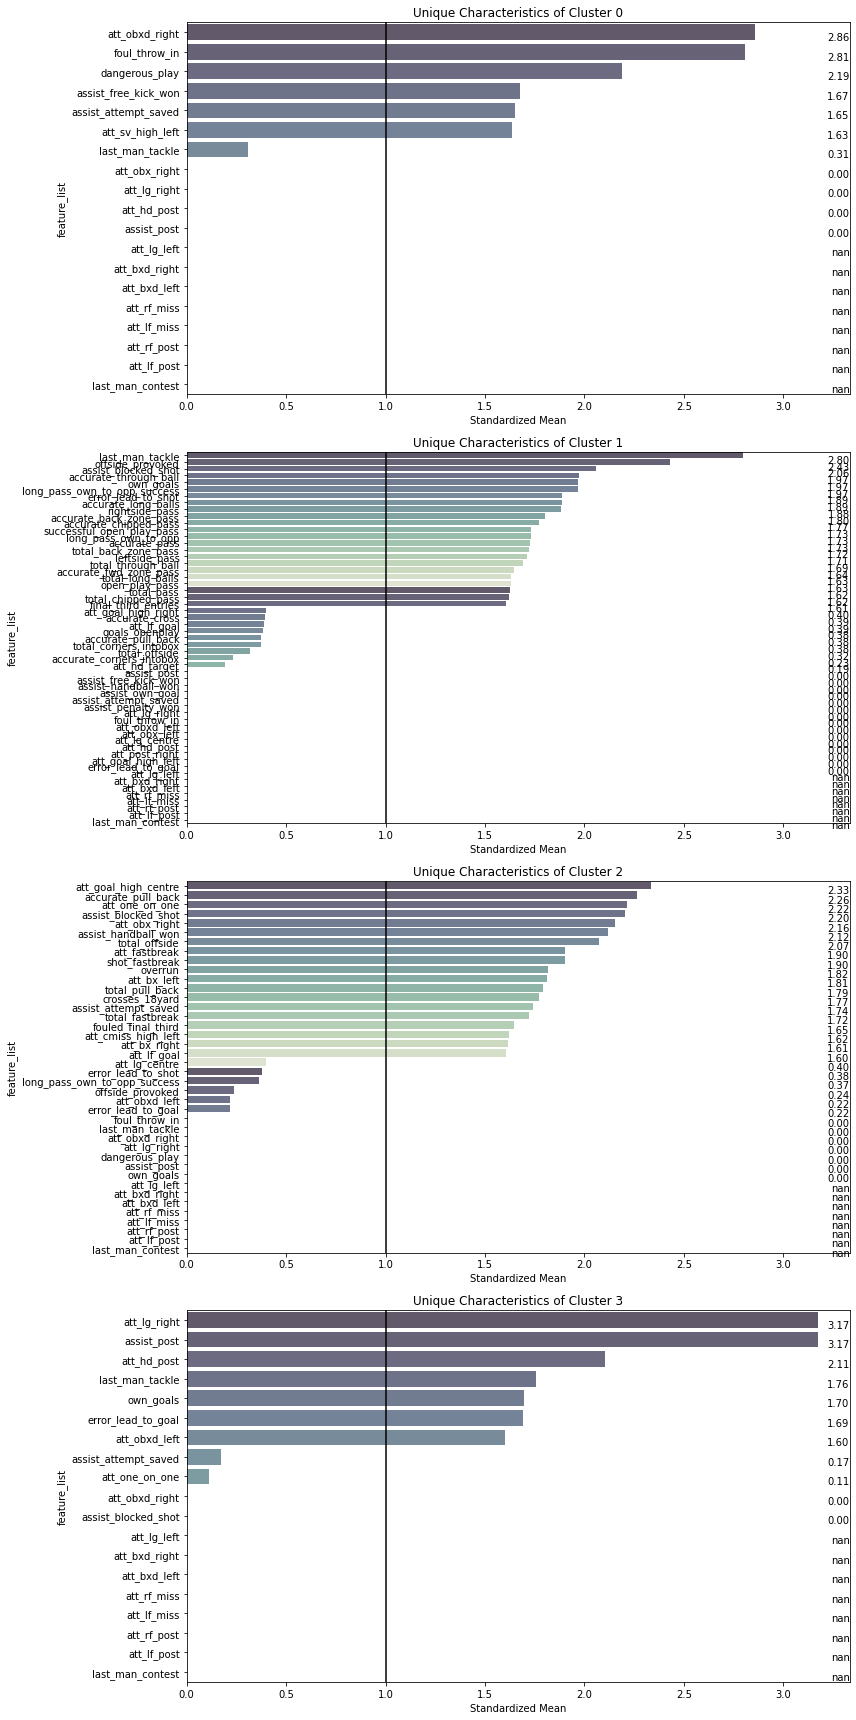

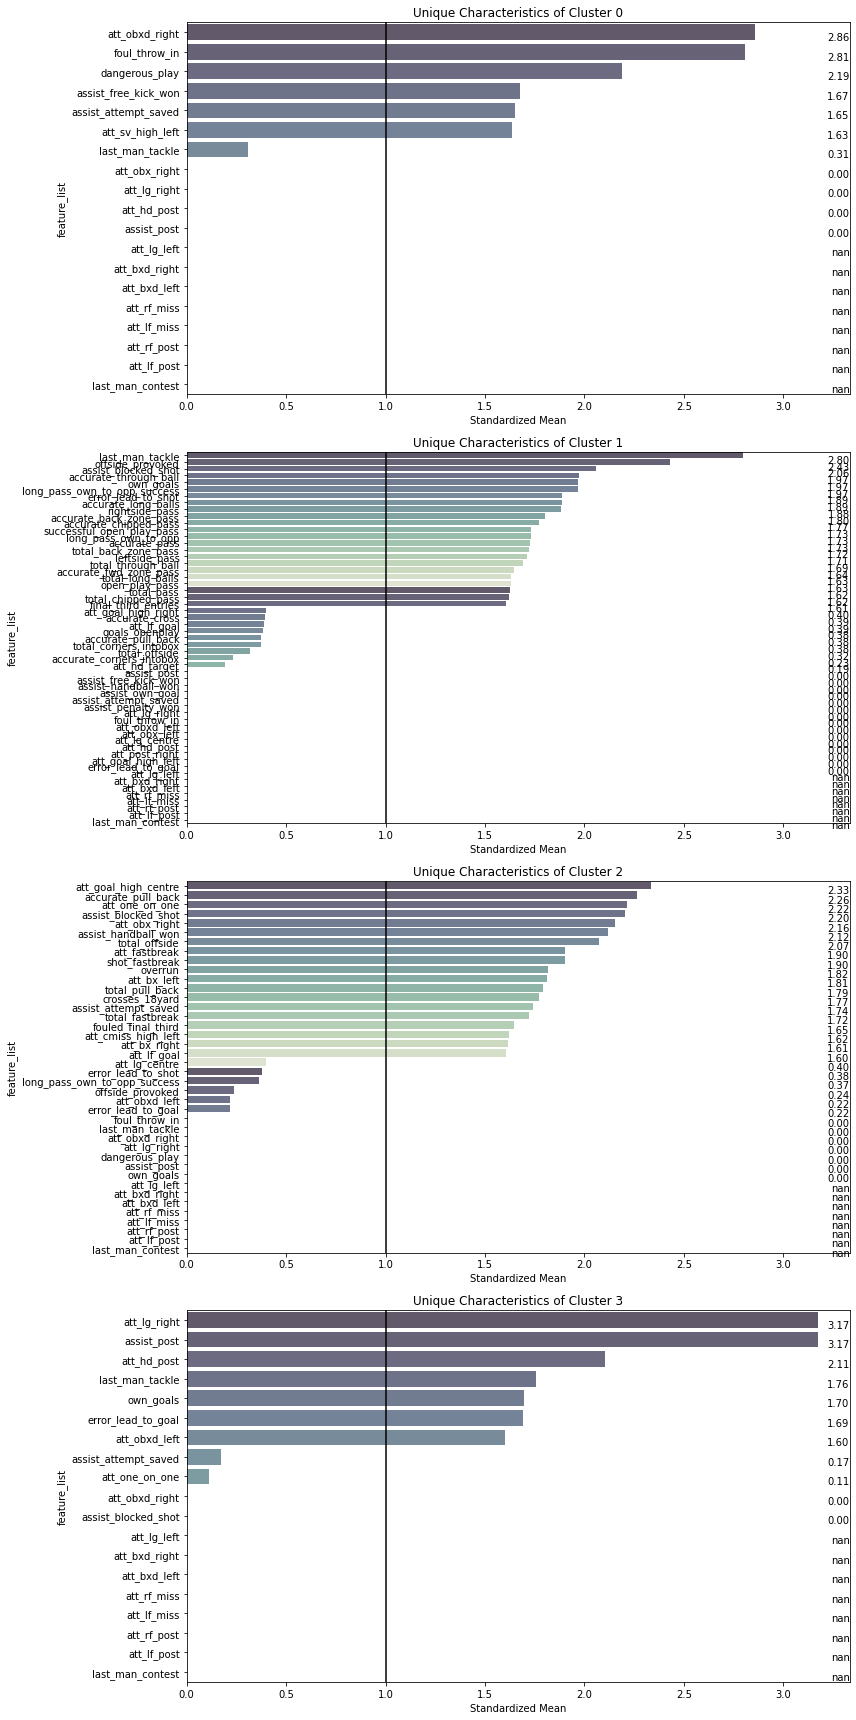

In [35]:
plot_features_all_cluster(df=dfskills, label_col='cluster', n_clusters=4, sensitivity=0.6)